In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.model_selection import KFold

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.ExcelFile('ModifiedData/Cu_sys_oh.xlsx')
print(data.sheet_names)

df1 = data.parse('Sheet1')
df1.head(5)

df2 = df1.drop(['Reference', 'Run #','LnDinv'], axis=1)
df2.dropna()
pd.options.display.max_rows = 999
df2.info()
df2.head()

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
D(Cu)          72 non-null float64
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
x1             72 non-null int64
x2             72 non-null int64
x3             72 non-null int64
x4             72 non-null int64
x5             72 non-null int64
x6             72 non-null int64
dtypes: float64(3), int64(6)
memory usage: 5.1 KB


,D(Cu),Dinv,LnFeDomains,x1,x2,x3,x4,x5,x6
0,0.43,2.325581,-0.063935,1,0,0,0,0,0
1,0.32,3.125000,-0.171537,1,0,0,0,0,0
2,0.33,3.030303,-0.297457,1,0,0,0,0,0
3,0.33,3.030303,-0.565593,1,0,0,0,0,0
4,0.24,4.166667,-0.818951,1,0,0,0,0,0


In [3]:
x = np.array(df2['LnFeDomains']).reshape(-1,1)
y = np.array(df2['Dinv'])

In [4]:
#from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing, cross_validation, neighbors

neigh = KNeighborsRegressor(n_neighbors=2)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)
    

neigh.fit(x_train,y_train)
 
print('score:',neigh.score(x_test,y_test))
y_pred = neigh.predict(x_test)

score: 0.8842261208602947


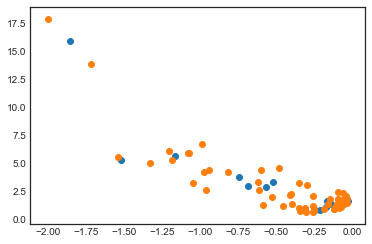

In [5]:
plt.scatter(x_test,y_pred)
plt.scatter(x_train,y_train)
plt.show()

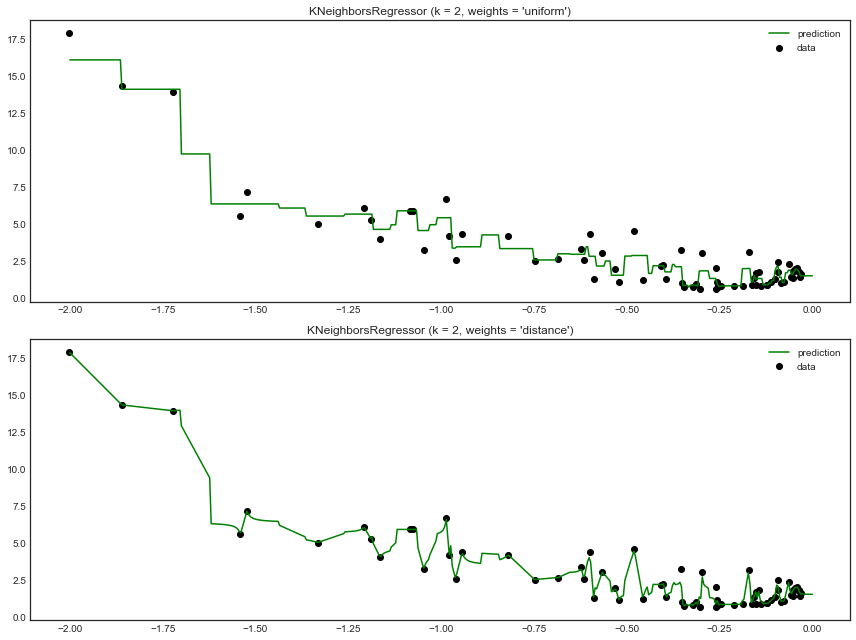

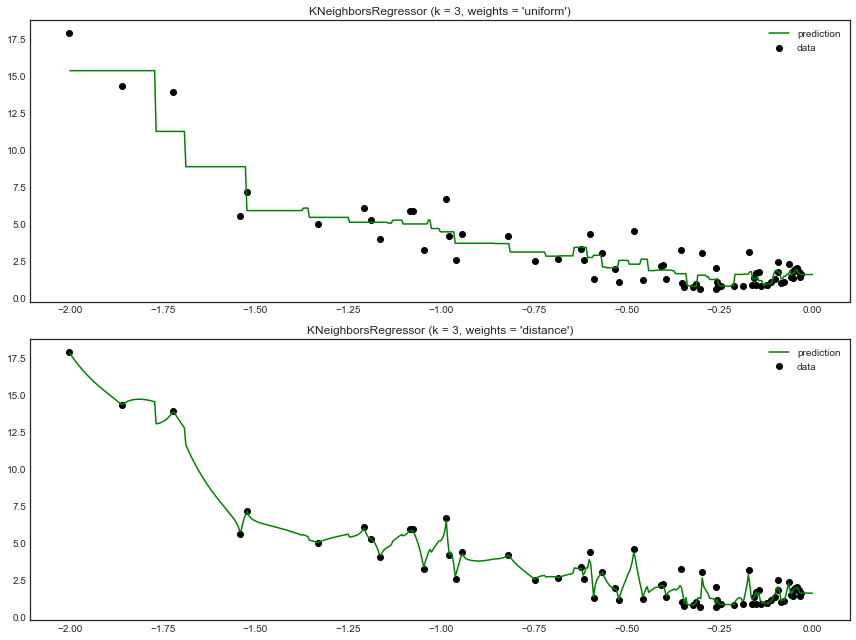

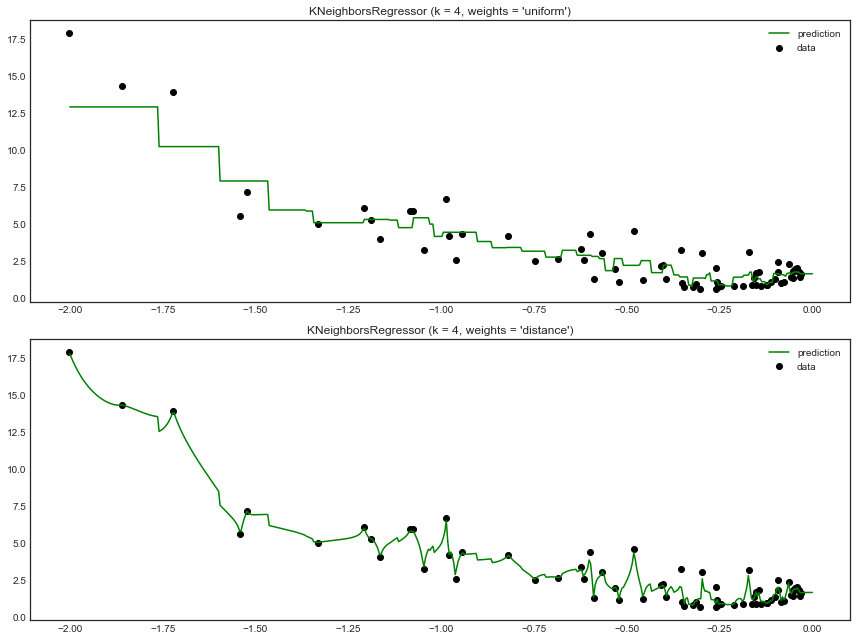

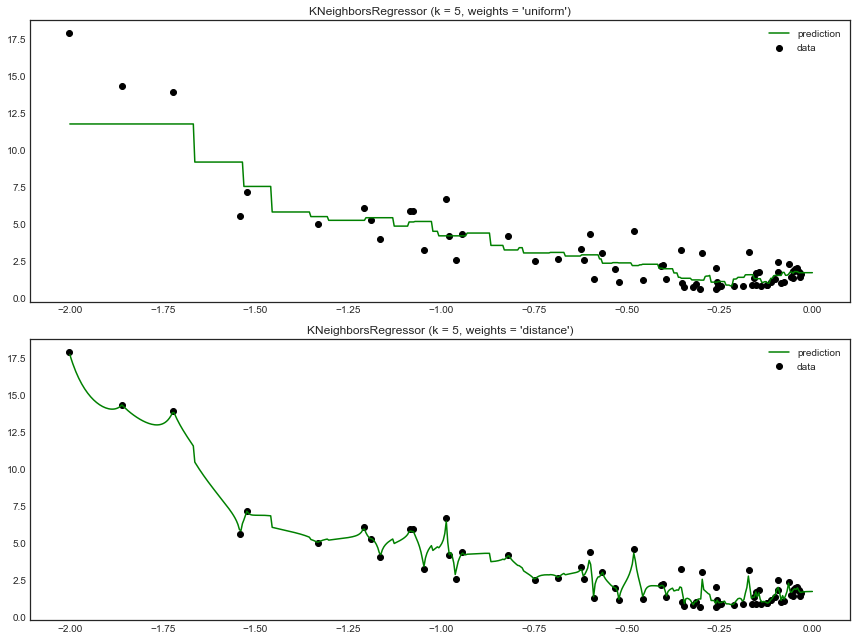

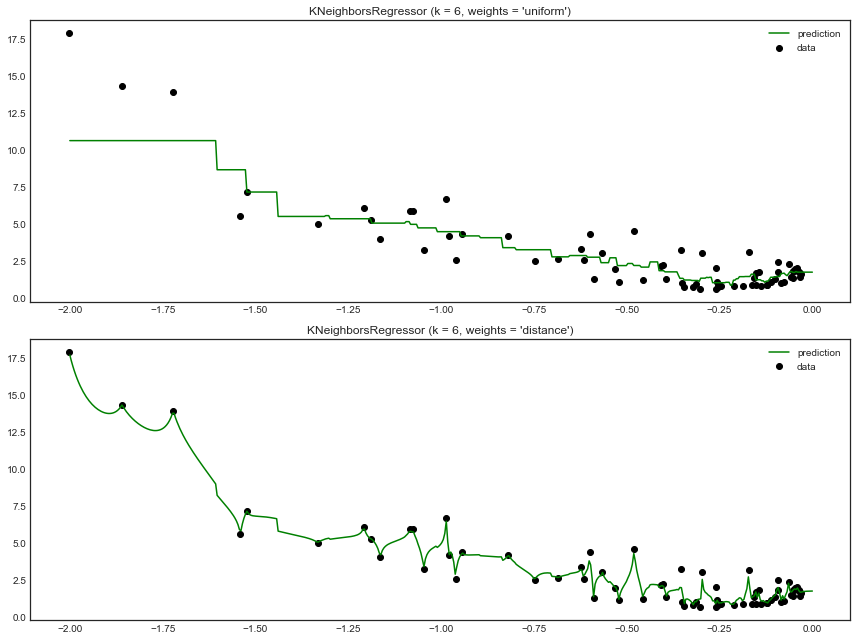

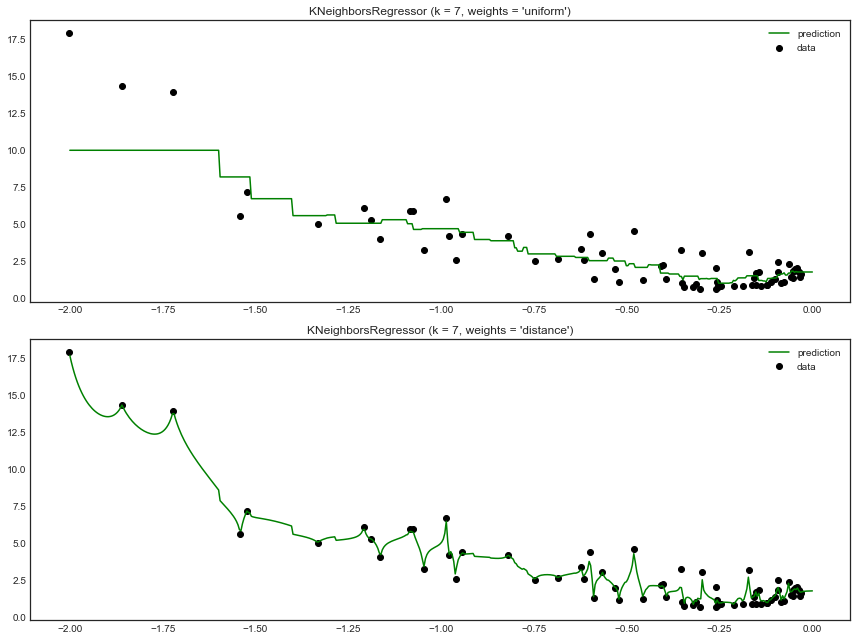

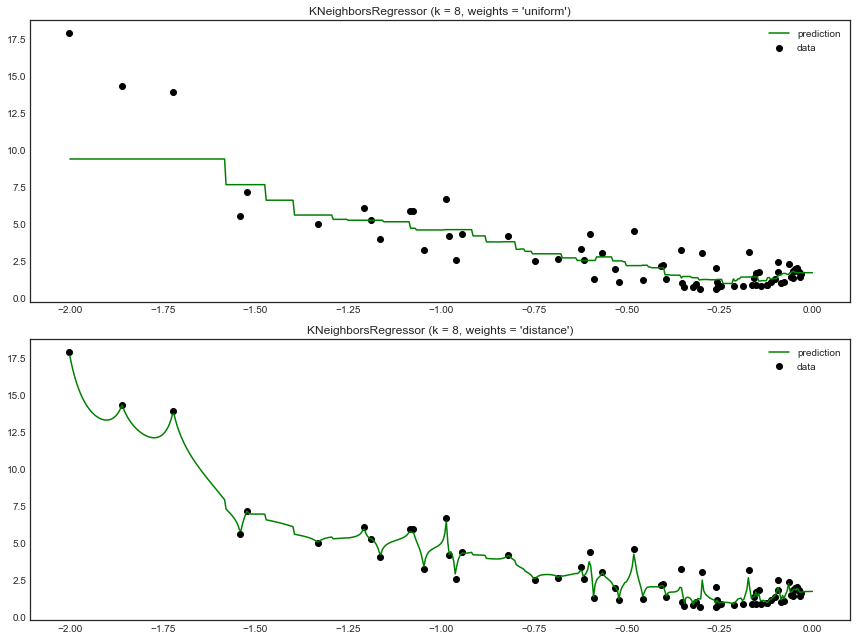

In [6]:
n = [2,3,4,5,6,7,8]
for i in n:
    # Fit regression model
    T = np.linspace(-2, 0, 500)[:, np.newaxis]
    n_neighbors = i

    for i, weights in enumerate(['uniform', 'distance']):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
        y_ = knn.fit(x, y).predict(T)

        fig_size = [12,9]
        plt.rcParams["figure.figsize"] = fig_size
        plt.subplot(2, 1, i + 1)
        plt.scatter(x, y, c='k', label='data')
        plt.plot(T, y_, c='g', label='prediction')
        plt.axis('tight')
        plt.legend()
        plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                    weights))

    plt.tight_layout()
    plt.show()

k = 2 >> seems to overfit, and k = 5 onwards, everything seems to be oversmoothened.

k = 3,4 >> look reasonable, and these curves resemble to the two degree curve in logFeDomains vs logDinv fit.

--------------------------

Testing the accuracy of the model

In [7]:
## Bootstrap test of average score
n_neighbors = [2,3,4,5,6]

for k in n_neighbors:
    neigh = KNeighborsRegressor(n_neighbors = k)

    score = []
    sum_score = 0    
    for i in range(1000):    
        x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)
        neigh.fit(x_train,y_train)
        # print('score:',neigh.score(x_test,y_test))
        y_pred = neigh.predict(x_test)

        score.append(neigh.score(x_test,y_test))
        sum_score += np.abs(neigh.score(x_test,y_test))

    avg_score = sum_score/1000
    print("KNeighborsRegressor (k = %i)" % (k))
    print("average score over 1000 bootstrap samples : ",avg_score)

KNeighborsRegressor (k = 2)
average score over 1000 bootstrap samples :  0.592799821636012
KNeighborsRegressor (k = 3)
average score over 1000 bootstrap samples :  0.6169142086824827
KNeighborsRegressor (k = 4)
average score over 1000 bootstrap samples :  0.6241902998403958
KNeighborsRegressor (k = 5)
average score over 1000 bootstrap samples :  0.6242323916737991
KNeighborsRegressor (k = 6)
average score over 1000 bootstrap samples :  0.6139417371053023


**We can clearly see that k = 4 provides the best fit.**

5-fold cross validation

In [8]:
neigh = KNeighborsRegressor(n_neighbors=2)

score = []
sum_score = 0
kf = KFold(n_splits=5)
kf.get_n_splits(x)
print(kf)

for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, 'TEST:', test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh.fit(X_train,y_train)
    print('score:',neigh.score(X_test,y_test))
    score.append(neigh.score(X_test,y_test))
    sum_score += np.abs(neigh.score(X_test,y_test))

avg_score = sum_score/5
print("average score:", avg_score)

KFold(n_splits=5, random_state=None, shuffle=False)
score: -0.39466671551668653
score: -1.1906872118344491
score: 0.6149900411878503
score: 0.4823837257387178
score: 0.19945861438765145
average score: 0.576437261733071


In [9]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


>> next we will try KERNEL REGRESSION